# Notebook 2 - Polinômio de Taylor e Método da Bisseção

Gabrielly de Andrade da Silva - 116149740

## 1. Polinômio de Taylor

O polinômio de Taylor (Pn) descreve um polinômio em torno de um determinado ponto. Vamos denotar o grau como **n**, a função **f** e o ponto **a**

$$
    Pn(x) = f(a) + f'(a)(x-a) + \frac{f''(a)(x-a)^2}{2} + \frac{f'''(a)(x-a)^3}{3!} + ... + \frac{f'''(a)(x-a)^n}{n!} 
$$

**Exemplo:**

Considere $fn(x) = e^x$

Sabemos que todas as suas derivadas valem o próprio $e^x$

Com isso temos o seguinte polinômio de Taylor:

$$
    Pn(x) = e^x + e^xx + \frac{e^xx^2}{2} + ... + \frac{e^xx^n}{n!}
$$

Considerando o ponto a=0 e n=3, o valor da função f(a) no ponto vale $e^a = e^0 = 1$, com isso temos que:

$$
    Pn(x) = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!}
$$

Considerando o valor de $x=1$, temos que o valor da função deve valer $f(1)=e$, com isso o polinômio também deve aproximar desse valor $Pn(1)=e$.

Sendo assim, o valor da função $e^x$ também é descrita como um somatório dos termos

$$
    1 + x + \frac{x^2}{2} + ... + \frac{x^n}{n!}
$$

sendo n o valor do grau do polinômio.

Vamos realizar alguns testes com o Julia

In [241]:
MathConstants.e

ℯ = 2.7182818284590...

In [242]:
exp(1)

2.718281828459045

In [243]:
function exp_por_taylor(x, n)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    soma = 1.0
    for i = 1:n
        soma += x^i / factorial(i) # Poderia ser factorial(BigInt(i)) mas não tem necessidade pois os termos tentes a zero
    end
    return soma
end

exp_por_taylor (generic function with 1 method)

In [244]:
exp_por_taylor(1.0, 1)

2.0

In [245]:
# Função genérica que calcula a quantidade de termos necessárias
n = 0
somatorio = exp_por_taylor(1, n)
while somatorio <= exp(1)
    n += 1
    somatorio = exp_por_taylor(1, n)
end

println("Somatório: ", somatorio)
println("Quantidade de termos (grau do polinômio): ", n)



Somatório: 2.7182818284590455
Quantidade de termos (grau do polinômio): 17


In [246]:
# Calculando a diferença do erro absoluta

exp_por_taylor(1.0, 17) - exp(1.0)

4.440892098500626e-16

In [247]:
# Caso que da overflow por conta do 21!
exp_por_taylor(5.0, 30) - exp(5.0)

LoadError: OverflowError: 21 is too large to look up in the table; consider using `factorial(big(21))` instead

In [248]:
function exp_por_taylor_2(x, n)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    soma = 1.0
    termo_anterior = 1.0
    for i = 1:n
        termo_anterior *= x / i
        soma += termo_anterior
    end
    return soma
end

exp_por_taylor_2 (generic function with 2 methods)

Com essa nova função não temos Overflow pois estamos calculando o próximo termo a partir do resultado do termo anterior

$$
    a_{n} = \frac{x^n}{n!} = \frac{x}{n} * \frac{x^(n-1)}{(n-1)!}
$$

In [249]:
exp_por_taylor_2(5.0, 32)

148.4131591025766

In [250]:
exp(5.0)

148.4131591025766

Nota: diferentemente do que foi visto no [vídeo](https://www.youtube.com/watch?v=220qYWumBHI&feature=youtu.be&list=PLOOY0eChA1uyO7qjoupZ3979741csLLTE&t=4024), tanto o exponencial do Julia quanto da função calculada chegaram a um mesmo valor

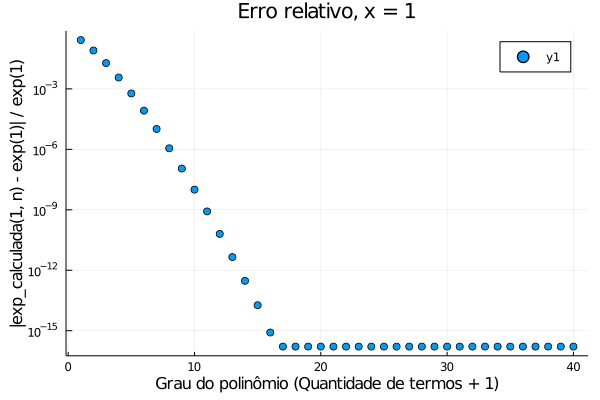

In [251]:
using Plots
N = collect(1:40)
x = 1
Erro = [abs(exp_por_taylor_2(x, n) - exp(x)) / exp(x) for n in N]

scatter(N, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("|exp_calculada($x, n) - exp($x)| / exp($x)")
title!("Erro relativo, x = $x")

TODO rever https://github.com/JuliaPlots/Plots.jl/releases quando aumento a quantidade de termos recebmo vários erros e warnings  ┌ Warning: No strict ticks found
└ @ PlotUtils /home/gabrielly/.julia/packages/PlotUtils/qd3Sm/src/ticks.jl:283


In [252]:
# Outra abordagem que simula o exp(x) do Julia

function exp_por_taylor_3(x)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    soma = 1.0
    termo_anterior = 1.0
    i = 1
    while soma + termo_anterior != soma
        termo_anterior *= x / i
        soma += termo_anterior
        i +=1
    end
    return soma
end

exp_por_taylor_3 (generic function with 1 method)

In [253]:
exp_por_taylor_3(1)

2.7182818284590455

In [254]:
exp(1)

2.718281828459045

In [255]:
exp_por_taylor_3(1) - exp(1)

4.440892098500626e-16

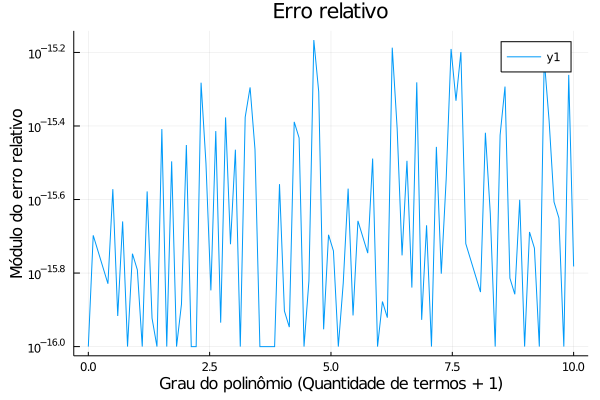

In [256]:
using Plots
X = range(0.0, 10.0, length=100)
Erro = [max(abs(exp_por_taylor_3(x) - exp(x)) / exp(x), 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("Módulo do erro relativo")
title!("Erro relativo")

# Erro precisa estar próximo da precisão da máquina, 10^-16

### Aproximando com séries alternadas

Séries alternadas são difíceis de manter, veja o erro na plotagem abaixo


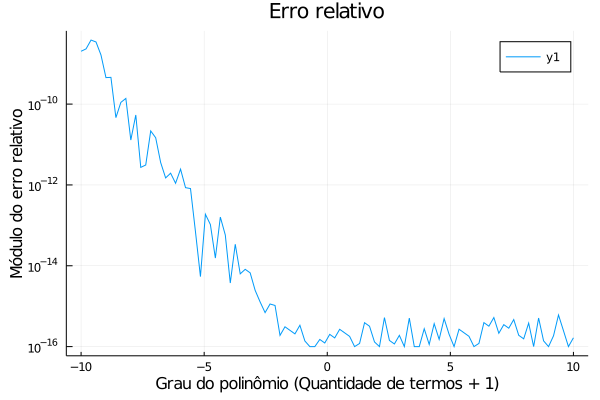

In [257]:

using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp_por_taylor_3(x) - exp(x)) / exp(x), 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("Módulo do erro relativo")
title!("Erro relativo")


In [263]:
# Outra abordagem que simula o exp(x) do Julia, mas agora olhando para cálculos negativos

function exp_por_taylor_4(x)
    # Calcula a exponencial de e^x com n termos pelo polinômio de Taylor
    
    if  x>= 0
        return exp_por_taylor_3(x)
    else
        return 1.0 / exp_por_taylor_3(-x)

    end
end

exp_por_taylor_4 (generic function with 1 method)

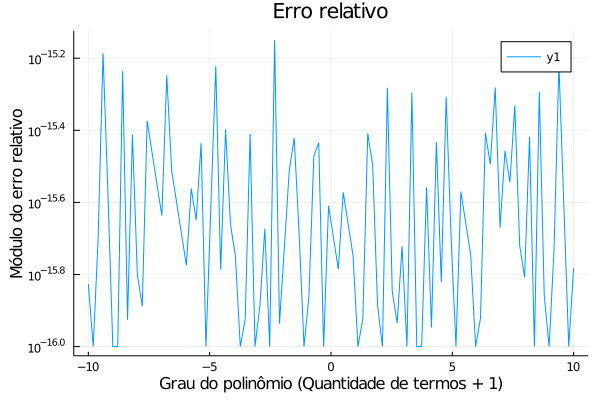

In [262]:
using Plots
X = range(-10.0, 10.0, length=100)
Erro = [max(abs(exp_por_taylor_4(x) - exp(x)) / exp(x), 1e-16) for x in X]

plot(X, Erro, yaxis=:log)
xlabel!("Grau do polinômio (Quantidade de termos + 1)")
ylabel!("Módulo do erro relativo")
title!("Erro relativo")


## Calculando pi

Aproximação do valor de pi

In [274]:
function pi_atan(n)
    # pi ~= 4 * (1 - 1/3 + 1/5 - 1/7 + 1/9 para n termos)
    # n   =      1    2     3     4     5
end

pi_atan (generic function with 1 method)

In [278]:
4 * (1.0 - 1.0/3.0 + 1.0/5.0)

3.466666666666667

In [277]:
@assert pi_atan(3) >= 1.0 - 1.0/3.0 + 1.0/5.0

LoadError: MethodError: no method matching isless(::Float64, ::Nothing)
Closest candidates are:
  isless(::Float64, !Matched::Float64) at float.jl:465
  isless(!Matched::Missing, ::Any) at missing.jl:87
  isless(::AbstractFloat, !Matched::AbstractFloat) at operators.jl:165
  ...